Members: Jay Cheong, Hari Devanathan, Leo Lillard, Joel Porcaro

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Extraction and Cleaning

In [2]:

from datetime import datetime, date, timedelta
date_start = date(2019,6,1)
date_end = date(2019,6,29)
num_days = (date_end-date_start).days
first_url = ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start).strftime('%y%m%d')+'.txt')
print(first_url)
df = pd.read_csv(first_url)
if num_days > 6:
    for i in range(num_days+1)[7::7]:
        url=('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start+timedelta(days=i)).strftime('%y%m%d')+'.txt')
        print(url)
        df = df.append(pd.read_csv(url), ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt


In [3]:
df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


In [4]:
df.shape

(1027180, 11)

In [5]:
df = df.rename(index=str, columns={"EXITS                                                               ": "EXITS"})
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


In [6]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Totals 

In [7]:
new_df = (df
          .set_index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC'])     
          .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])
          .diff(periods=-1))
new_df = new_df.fillna(0)
new_df['ENTRIES'] = np.absolute(new_df['ENTRIES'])
new_df['EXITS'] = np.absolute(new_df['EXITS'])
new_df['TOTALS'] = new_df['ENTRIES'] + new_df['EXITS']
new_df = new_df.reset_index()
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [8]:
new_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TOTALS'],
      dtype='object')

In [9]:
new_df.sort_values(by=['TOTALS'], ascending=False).head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
481766,N207,R104,00-00-00,167 ST,BD,IND,06/14/2019,12:00:00,REGULAR,1.819016e+09,1.821590e+09,3.640606e+09
788088,R311,R053,00-00-00,3 AV-149 ST,25,IRT,06/19/2019,12:00:00,REGULAR,1.169827e+09,1.353647e+09,2.523473e+09
787793,R310,R053,01-00-02,3 AV-149 ST,25,IRT,06/19/2019,12:00:00,REGULAR,1.061119e+09,1.136398e+09,2.197517e+09
140413,R160A,R164,00-06-00,66 ST-LINCOLN,1,IRT,05/31/2019,05:00:00,REGULAR,1.661416e+09,3.861678e+08,2.047584e+09
788131,R311,R053,00-00-01,3 AV-149 ST,25,IRT,06/19/2019,12:00:00,REGULAR,7.019226e+08,1.052777e+09,1.754699e+09
1008212,R521,R327,00-06-00,52 ST,7,IRT,06/28/2019,05:00:00,REGULAR,8.678275e+08,1.743245e+08,1.042152e+09
714183,N510,R163,02-00-01,14 ST,FLM123,IND,06/18/2019,00:00:00,REGULAR,6.214849e+08,3.695330e+08,9.910179e+08
1008208,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,13:00:00,REGULAR,7.665461e+08,1.712709e+08,9.378169e+08
373847,R293,R133,00-06-01,MOSHOLU PKWY,4,IRT,06/06/2019,09:00:00,REGULAR,4.511629e+08,6.682709e+07,5.179900e+08
996182,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,17:00:00,RECOVR AUD,1.580400e+04,3.355247e+08,3.355405e+08


In [10]:
new_df.shape

(1027180, 12)

In [11]:
new_df = new_df.loc[new_df['TOTALS'] < 5000]
new_df = new_df.loc[new_df['TOTALS'] >= 0]
new_df = new_df.loc[new_df['EXITS'] >= 0]
new_df = new_df.loc[new_df['ENTRIES'] >= 0]
new_df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [14]:
new_df.shape

(1026720, 12)

In [15]:
new_df = new_df.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
new_df.shape

(1026702, 12)

In [16]:
new_df.describe()

,ENTRIES,EXITS,TOTALS
count,1.026702e+06,1.026702e+06,1.026702e+06
mean,1.710920e+02,1.365102e+02,3.076021e+02
std,2.483540e+02,2.316897e+02,3.850414e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,8.000000e+00,2.900000e+01
50%,7.200000e+01,5.300000e+01,1.700000e+02
75%,2.340000e+02,1.650000e+02,4.470000e+02
max,3.963000e+03,4.753000e+03,4.838000e+03


## Timestamp

In [17]:
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [18]:
new_df['DATETIME'] = new_df['DATE'] + ' ' + new_df['TIME']
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00


In [24]:
new_df['DATETIME1'] = pd.to_datetime(new_df['DATETIME'])
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,5,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,5,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,5,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,5,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,6,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,6,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,6,12


In [25]:
new_df['WEEKDAY'] = new_df['DATETIME1'].dt.weekday_name
new_df['WEEKDAYNUM'] = new_df['DATETIME1'].dt.weekday
new_df['HOUR'] = new_df['DATETIME1'].dt.hour
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,5,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,5,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,5,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,5,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,6,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,6,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,6,12


In [26]:
new_df["TIME"] = new_df['HOUR'].map({8 : "8:00am - 12:00am", 16 : "4:00pm - 8:00pm",
                 9 : "8:00am - 12:00am", 10 : "8:00am - 12:00am", 17 : "4:00pm - 8:00pm", 18 : "4:00pm - 8:00pm",
                 11: "8:00am - 12:00am", 19 :"4:00pm - 8:00pm"})
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,5,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,5,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,5,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,5,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,6,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,6,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,6,12


In [27]:
new_df = new_df.dropna()
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,4:00pm - 8:00pm,REGULAR,185.0,36.0,221.0,05/26/2019 16:00:00,2019-05-26 16:00:00,Sunday,6,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,8:00am - 12:00am,REGULAR,79.0,51.0,130.0,05/27/2019 08:00:00,2019-05-27 08:00:00,Monday,0,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,4:00pm - 8:00pm,REGULAR,270.0,35.0,305.0,05/27/2019 16:00:00,2019-05-27 16:00:00,Monday,0,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,8:00am - 12:00am,REGULAR,175.0,214.0,389.0,05/28/2019 08:00:00,2019-05-28 08:00:00,Tuesday,1,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,4:00pm - 8:00pm,REGULAR,730.0,80.0,810.0,05/28/2019 16:00:00,2019-05-28 16:00:00,Tuesday,1,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,8:00am - 12:00am,REGULAR,188.0,254.0,442.0,05/29/2019 08:00:00,2019-05-29 08:00:00,Wednesday,2,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,4:00pm - 8:00pm,REGULAR,740.0,80.0,820.0,05/29/2019 16:00:00,2019-05-29 16:00:00,Wednesday,2,16


In [28]:
new_df.describe()

,ENTRIES,EXITS,TOTALS,WEEKDAYNUM,HOUR
count,346355.000000,346355.000000,346355.000000,346355.000000,346355.000000
mean,249.303688,207.654531,456.958219,2.990481,12.492446
std,305.609403,303.199166,469.670571,1.993154,4.054683
min,0.000000,0.000000,0.000000,0.000000,8.000000
25%,41.000000,26.000000,112.000000,1.000000,8.000000
50%,151.000000,103.000000,325.000000,3.000000,11.000000
75%,342.000000,265.000000,659.000000,5.000000,16.000000
max,3963.000000,4753.000000,4838.000000,6.000000,19.000000


In [29]:
import pickle

with open('clean_turnstile.pickle', 'wb') as to_write:
    pickle.dump(new_df, to_write)

In [1]:
!ls

Clean Turnstile Totals - Hari.ipynb Project Benson.ipynb
Clean Turnstile Totals-Jay.ipynb    README.md
Joel_EDA.ipynb                      clean_turnstile.pickle


# Analysis

In [31]:
with open('clean_turnstile.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [32]:
station_df = new_df.groupby('STATION', as_index=False)['TOTALS'].sum()
station_df = station_df.sort_values(by=['TOTALS'], ascending=False)
station_df.head(20)

,STATION,TOTALS
61,34 ST-PENN STA,5117991.0
232,GRD CNTRL-42 ST,4843839.0
59,34 ST-HERALD SQ,4256001.0
352,TIMES SQ-42 ST,3439088.0
46,23 ST,3318789.0
14,14 ST-UNION SQ,2988466.0
68,42 ST-PORT AUTH,2941170.0
110,86 ST,2642147.0
225,FULTON ST,2442310.0
172,CANAL ST,2421200.0


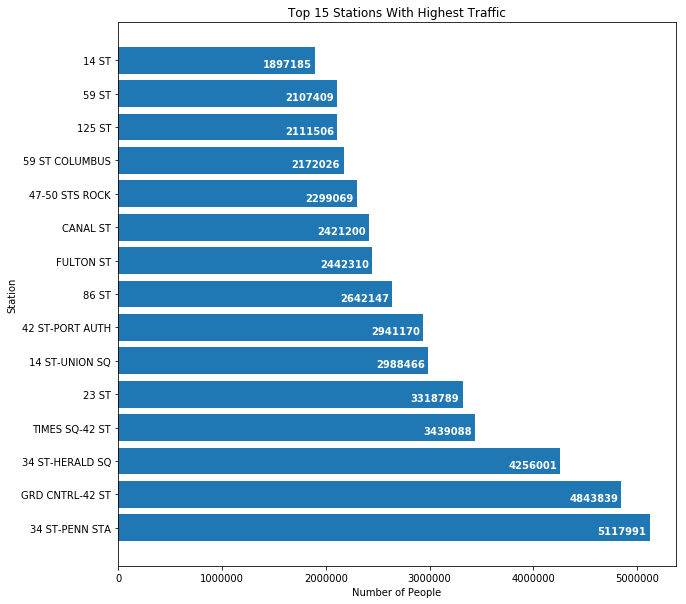

In [33]:
plt.figure(figsize=(10,10))
top_ten_station = station_df[0:15]
plt.barh(top_ten_station['STATION'],top_ten_station['TOTALS'])
plt.xlabel('Number of People')
plt.ylabel('Station')
plt.title('Top 15 Stations With Highest Traffic')
for i, v in enumerate(top_ten_station['TOTALS']):
    plt.text(v-500000, i-0.2, str(round(v)), color='white', fontweight='bold')

In [34]:
new_df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,4:00pm - 8:00pm,REGULAR,185.0,36.0,221.0,05/26/2019 16:00:00,2019-05-26 16:00:00,Sunday,6,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,8:00am - 12:00am,REGULAR,79.0,51.0,130.0,05/27/2019 08:00:00,2019-05-27 08:00:00,Monday,0,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,4:00pm - 8:00pm,REGULAR,270.0,35.0,305.0,05/27/2019 16:00:00,2019-05-27 16:00:00,Monday,0,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,8:00am - 12:00am,REGULAR,175.0,214.0,389.0,05/28/2019 08:00:00,2019-05-28 08:00:00,Tuesday,1,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,4:00pm - 8:00pm,REGULAR,730.0,80.0,810.0,05/28/2019 16:00:00,2019-05-28 16:00:00,Tuesday,1,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,8:00am - 12:00am,REGULAR,188.0,254.0,442.0,05/29/2019 08:00:00,2019-05-29 08:00:00,Wednesday,2,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,4:00pm - 8:00pm,REGULAR,740.0,80.0,820.0,05/29/2019 16:00:00,2019-05-29 16:00:00,Wednesday,2,16


In [35]:
mean_totals_df = new_df.groupby(['DATE', 'TIME'])['TOTALS'].agg({'mean'})
mean_totals_df = mean_totals_df.reset_index()
mean_totals_df.head(15)

,DATE,TIME,mean
0,05/25/2019,4:00pm - 8:00pm,321.377842
1,05/25/2019,8:00am - 12:00am,239.885744
2,05/26/2019,4:00pm - 8:00pm,273.253044
3,05/26/2019,8:00am - 12:00am,210.882158
4,05/27/2019,4:00pm - 8:00pm,277.467344
5,05/27/2019,8:00am - 12:00am,205.691900
6,05/28/2019,4:00pm - 8:00pm,622.352042
7,05/28/2019,8:00am - 12:00am,482.398918
8,05/29/2019,4:00pm - 8:00pm,640.435451
9,05/29/2019,8:00am - 12:00am,504.198555


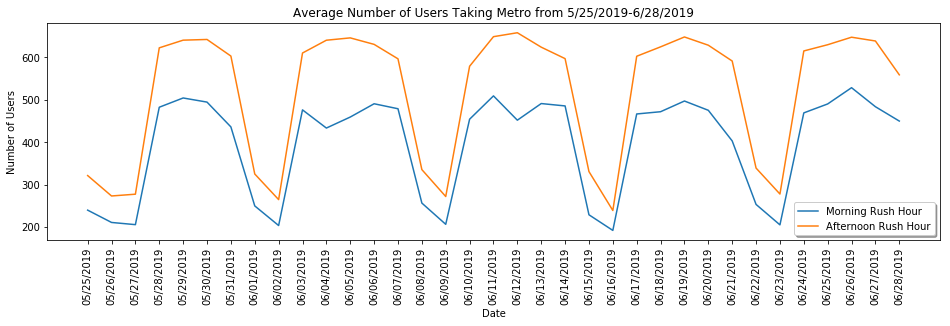

In [36]:
%matplotlib inline

morning_rush_df = mean_totals_df.loc[mean_totals_df['TIME'] == '8:00am - 12:00am']
afternoon_rush_df = mean_totals_df.loc[mean_totals_df['TIME'] == '4:00pm - 8:00pm']

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(morning_rush_df['DATE'],morning_rush_df['mean'])
plt.plot(afternoon_rush_df ['DATE'],afternoon_rush_df['mean'])
plt.title('Average Number of Users Taking Metro from 5/25/2019-6/28/2019')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(['Morning Rush Hour', 'Afternoon Rush Hour'], shadow = True, loc = 0);

In [37]:
weekday_mean_totals_df = (new_df
                          .groupby(['WEEKDAY', 'TIME', 'WEEKDAYNUM'])['TOTALS']
                          .agg({'mean'}))
weekday_mean_totals_df = weekday_mean_totals_df.reset_index()

weekday_mean_totals_df= weekday_mean_totals_df.sort_values(by=['WEEKDAYNUM'])
weekday_mean_totals_df= weekday_mean_totals_df.drop('WEEKDAYNUM', axis=1)

weekday_mean_totals_df.head(15)

,WEEKDAY,TIME,mean
2,Monday,4:00pm - 8:00pm,537.459471
3,Monday,8:00am - 12:00am,415.463275
10,Tuesday,4:00pm - 8:00pm,633.140879
11,Tuesday,8:00am - 12:00am,476.187651
12,Wednesday,4:00pm - 8:00pm,647.902191
13,Wednesday,8:00am - 12:00am,486.825821
8,Thursday,4:00pm - 8:00pm,632.690629
9,Thursday,8:00am - 12:00am,486.862942
0,Friday,4:00pm - 8:00pm,588.922852
1,Friday,8:00am - 12:00am,448.155029


In [38]:
morning_rush_weekday_df = weekday_mean_totals_df.loc[weekday_mean_totals_df['TIME'] == '8:00am - 12:00am']
morning_rush_weekday_df

,WEEKDAY,TIME,mean
3,Monday,8:00am - 12:00am,415.463275
11,Tuesday,8:00am - 12:00am,476.187651
13,Wednesday,8:00am - 12:00am,486.825821
9,Thursday,8:00am - 12:00am,486.862942
1,Friday,8:00am - 12:00am,448.155029
5,Saturday,8:00am - 12:00am,245.393928
7,Sunday,8:00am - 12:00am,203.659177


In [39]:
afternoon_rush_weekday_df = weekday_mean_totals_df.loc[weekday_mean_totals_df['TIME'] == '4:00pm - 8:00pm']
afternoon_rush_weekday_df

,WEEKDAY,TIME,mean
2,Monday,4:00pm - 8:00pm,537.459471
10,Tuesday,4:00pm - 8:00pm,633.140879
12,Wednesday,4:00pm - 8:00pm,647.902191
8,Thursday,4:00pm - 8:00pm,632.690629
0,Friday,4:00pm - 8:00pm,588.922852
4,Saturday,4:00pm - 8:00pm,330.349765
6,Sunday,4:00pm - 8:00pm,265.377472


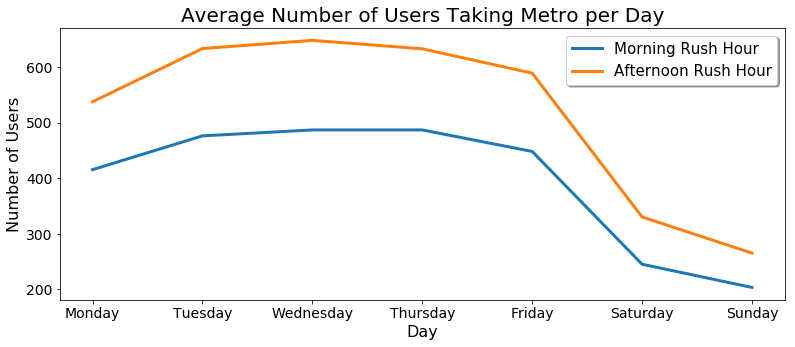

In [40]:
plt.figure(figsize=(13,5))
plt.plot(morning_rush_weekday_df['WEEKDAY'], morning_rush_weekday_df['mean'], linewidth=3)
plt.plot(afternoon_rush_weekday_df['WEEKDAY'], afternoon_rush_weekday_df['mean'], linewidth=3)
plt.title('Average Number of Users Taking Metro per Day', size=20)
plt.xlabel('Day', size=16)
plt.xticks(fontsize=14)
plt.ylabel('Number of Users', size=16)
plt.yticks(fontsize=14)
plt.legend(['Morning Rush Hour', 'Afternoon Rush Hour'], shadow = True, loc = 1, prop={'size': 15})



In [41]:
weekday_df = new_df.loc[(new_df['WEEKDAY'] != 'Saturday') & (new_df['WEEKDAY'] != 'Sunday')]
weekday_df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,8:00am - 12:00am,REGULAR,79.0,51.0,130.0,05/27/2019 08:00:00,2019-05-27 08:00:00,Monday,0,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,4:00pm - 8:00pm,REGULAR,270.0,35.0,305.0,05/27/2019 16:00:00,2019-05-27 16:00:00,Monday,0,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,8:00am - 12:00am,REGULAR,175.0,214.0,389.0,05/28/2019 08:00:00,2019-05-28 08:00:00,Tuesday,1,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,4:00pm - 8:00pm,REGULAR,730.0,80.0,810.0,05/28/2019 16:00:00,2019-05-28 16:00:00,Tuesday,1,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,8:00am - 12:00am,REGULAR,188.0,254.0,442.0,05/29/2019 08:00:00,2019-05-29 08:00:00,Wednesday,2,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,4:00pm - 8:00pm,REGULAR,740.0,80.0,820.0,05/29/2019 16:00:00,2019-05-29 16:00:00,Wednesday,2,16
32,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2019,8:00am - 12:00am,REGULAR,183.0,199.0,382.0,05/30/2019 08:00:00,2019-05-30 08:00:00,Thursday,3,8
34,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2019,4:00pm - 8:00pm,REGULAR,719.0,95.0,814.0,05/30/2019 16:00:00,2019-05-30 16:00:00,Thursday,3,16
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/31/2019,8:00am - 12:00am,REGULAR,198.0,165.0,363.0,05/31/2019 08:00:00,2019-05-31 08:00:00,Friday,4,8
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/31/2019,4:00pm - 8:00pm,REGULAR,767.0,78.0,845.0,05/31/2019 16:00:00,2019-05-31 16:00:00,Friday,4,16


In [42]:
#station_mean_totals_df.loc[station_mean_totals_df['TIME'] == '8:00am - 12:00am']
#station_mean_totals_df = new_df.groupby(['STATION', 'DATE', 'TIME'])['TOTALS'].agg({'sum'})
station_mean_totals_df = weekday_df.groupby(['STATION', 'DATE', 'TIME'])['TOTALS'].agg({'sum'})
station_mean_totals_df = station_mean_totals_df.reset_index()
station_mean_totals_df = station_mean_totals_df.rename(columns={'sum': 'USERS'})
station_mean_totals_df.head(15)

,STATION,DATE,TIME,USERS
0,1 AV,05/27/2019,4:00pm - 8:00pm,3185.0
1,1 AV,05/27/2019,8:00am - 12:00am,1722.0
2,1 AV,05/28/2019,4:00pm - 8:00pm,11779.0
3,1 AV,05/28/2019,8:00am - 12:00am,9710.0
4,1 AV,05/29/2019,4:00pm - 8:00pm,13778.0
5,1 AV,05/29/2019,8:00am - 12:00am,10081.0
6,1 AV,05/30/2019,4:00pm - 8:00pm,14072.0
7,1 AV,05/30/2019,8:00am - 12:00am,9984.0
8,1 AV,05/31/2019,4:00pm - 8:00pm,12594.0
9,1 AV,05/31/2019,8:00am - 12:00am,9875.0


In [43]:
station_mean_totals_df_morning_rush = station_mean_totals_df.loc[station_mean_totals_df['TIME'] == '8:00am - 12:00am']
station_mean_totals_df_afternoon_rush = station_mean_totals_df.loc[station_mean_totals_df['TIME'] == '4:00pm - 8:00pm']

In [44]:
top_station_means_morning_rush_df = station_mean_totals_df_morning_rush.groupby('STATION')['USERS'].agg({'mean'}).sort_values(by=['mean'], ascending=False).reset_index()
top_station_means_morning_rush_df.head(15)

,STATION,mean
0,34 ST-PENN STA,77541.84
1,GRD CNTRL-42 ST,74751.64
2,34 ST-HERALD SQ,60013.08
3,TIMES SQ-42 ST,49752.60
4,23 ST,48958.44
5,42 ST-PORT AUTH,43233.84
6,47-50 STS ROCK,40323.84
7,14 ST-UNION SQ,40313.52
8,86 ST,39590.84
9,FULTON ST,37478.44


In [45]:
top_station_means_afternoon_rush_df = station_mean_totals_df_afternoon_rush.groupby('STATION')['USERS'].agg({'mean'}).sort_values(by=['mean'], ascending=False).reset_index()
top_station_means_afternoon_rush_df.head(15)

,STATION,mean
0,GRD CNTRL-42 ST,98120.88
1,34 ST-PENN STA,96496.56
2,34 ST-HERALD SQ,85461.60
3,TIMES SQ-42 ST,67879.16
4,23 ST,66793.36
5,14 ST-UNION SQ,58387.24
6,42 ST-PORT AUTH,53003.44
7,86 ST,48830.64
8,FULTON ST,47114.68
9,CANAL ST,46534.36


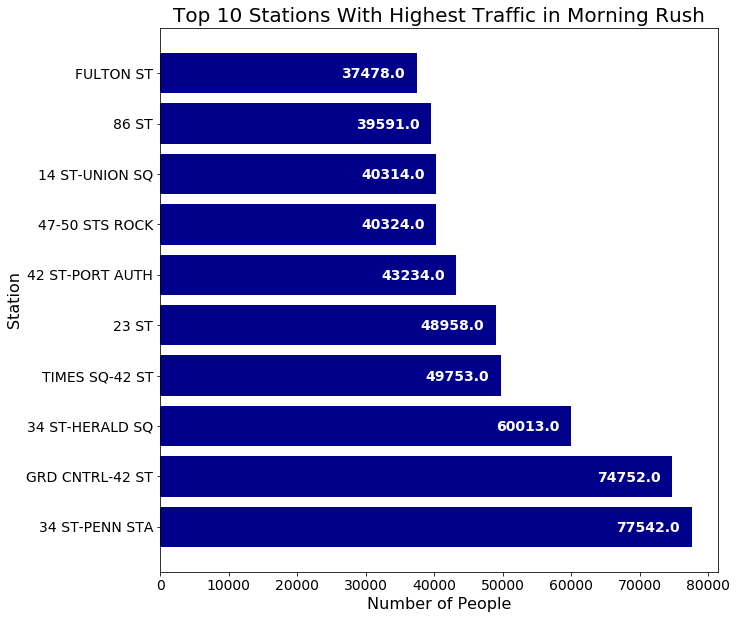

In [46]:
plt.figure(figsize=(10,10))
top_ten_morning_rush_station = top_station_means_morning_rush_df[0:10]
plt.barh(top_ten_morning_rush_station['STATION'],top_ten_morning_rush_station['mean'], color="darkblue")
plt.xlabel('Number of People', size=16)
plt.ylabel('Station', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Stations With Highest Traffic in Morning Rush', size=20)
for i, v in enumerate(top_ten_morning_rush_station['mean']):
    plt.text(v-11000, i-0.1, str(np.round(v)), color='white', fontweight='bold', fontsize=14)

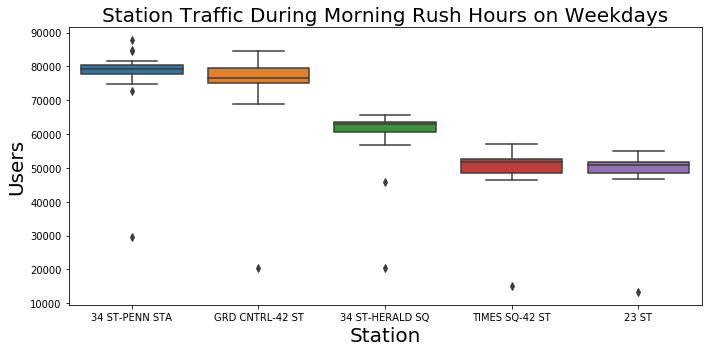

In [47]:
plt.figure(figsize=(10, 5))

top_ten_morning_rush_station = station_mean_totals_df_morning_rush.sort_values(by=['USERS'], ascending=False)

#cat = ['YORK ST', '30 AV', '57 ST-7 AV', '34 ST-HERALD SQ', 'HIGH ST' , 'NOSTRAND AV', 'MYRTLE AV', 'HOYT-SCHER',
#       '42 ST-BRYANT PK', 'ASTORIA DITMARS' ]

#cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST', '47-50 STS ROCK', 
#       '14 ST-UNION SQ', '42 ST-PORT AUTH', '86 ST', 'FULTON ST']

cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST']

top_ten_morning_rush_station = top_ten_morning_rush_station.loc[top_ten_morning_rush_station['STATION'].isin(cat)]
top_ten_morning_rush_station.sort_values

ax = sns.boxplot(top_ten_morning_rush_station['STATION'],top_ten_morning_rush_station['USERS'], order=cat)
ax.set_title('Station Traffic During Morning Rush Hours on Weekdays',fontsize=20)
ax.set_xlabel("Station",fontsize=20)
ax.set_ylabel("Users",fontsize=20)

medians = top_ten_morning_rush_station.groupby(['STATION'])['USERS'].median()
median_labels = [str(np.round(s)) for s in medians]

#pos = range(len(medians))
#for tick,label in zip(pos,ax.get_xticklabels()):
#    plt.text(pos[tick], medians[label.get_text()]-2000, str(np.round(medians[label.get_text()])), 
#            horizontalalignment='center', size='large', color='w', weight='semibold')
#for tick,label in zip(pos,ax.get_xticklabels()):
#    plt.text(pos[tick], 88000, str(np.round(medians[label.get_text()])), 
#            horizontalalignment='center', size='large', color='black', weight='semibold')

plt.tight_layout()

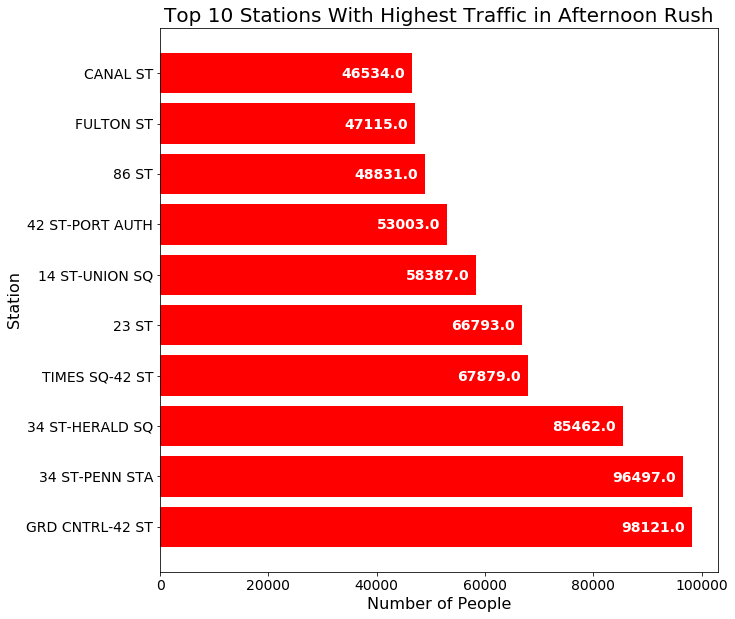

In [48]:
plt.figure(figsize=(10,10))
top_ten_afternoon_rush_station = top_station_means_afternoon_rush_df[0:10]
plt.barh(top_ten_afternoon_rush_station['STATION'],top_ten_afternoon_rush_station['mean'], color="red")
plt.xlabel('Number of People', size=16)
plt.ylabel('Station', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Stations With Highest Traffic in Afternoon Rush', size=20)
for i, v in enumerate(top_ten_afternoon_rush_station['mean']):
    plt.text(v-13000, i-0.1, str(np.round(v)), color='white', fontweight='bold', fontsize=14)

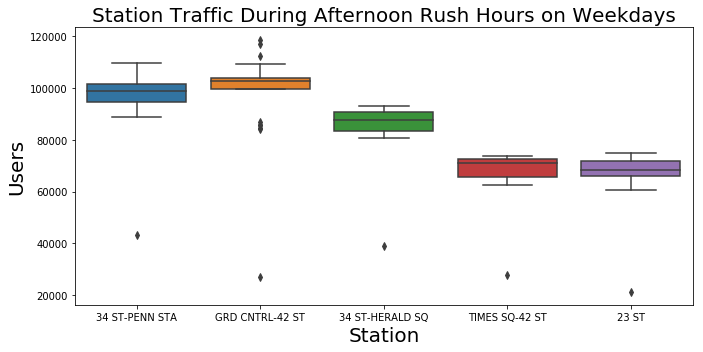

In [49]:
plt.figure(figsize=(10,5))

top_ten_afternoon_rush_station = station_mean_totals_df_afternoon_rush.sort_values(by=['USERS'], ascending=False)

#cat = ['YORK ST', '57 ST-7 AV', '34 ST-HERALD SQ', '14 ST-UNION SQ', '42 ST-BRYANT PK', 'W 4 ST-WASH SQ', 'GRD CNTRL-42 ST',
#      'HOYT-SCHER', 'TIMES SQ-42 ST', 'HIGH ST']

#cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST', '14 ST-UNION SQ', 
#       '42 ST-PORT AUTH', 'FULTON ST', '86 ST', 'CANAL ST']

cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST']

top_ten_afternoon_rush_station = top_ten_afternoon_rush_station.loc[top_ten_afternoon_rush_station['STATION'].isin(cat)]

ax = sns.boxplot(top_ten_afternoon_rush_station['STATION'],top_ten_afternoon_rush_station['USERS'], order=cat)
ax.set_title('Station Traffic During Afternoon Rush Hours on Weekdays',fontsize=20)
ax.set_xlabel("Station",fontsize=20)
ax.set_ylabel("Users",fontsize=20)

medians = top_ten_afternoon_rush_station.groupby(['STATION'])['USERS'].median()
median_labels = [str(np.round(s)) for s in medians]

#pos = range(len(medians))
#for tick,label in zip(pos,ax.get_xticklabels()):
#    plt.text(pos[tick], medians[label.get_text()]-2600, str(np.round(medians[label.get_text()])), 
#            horizontalalignment='center', size='large', color='w', weight='semibold')
    
#for tick,label in zip(pos,ax.get_xticklabels()):
#    plt.text(pos[tick], 115500, str(np.round(medians[label.get_text()])), 
#             horizontalalignment='center', size='large', color='black', weight='semibold')

plt.tight_layout()




Text(0.5, 1.0, 'Mean Traffic at Top 5 Stations')

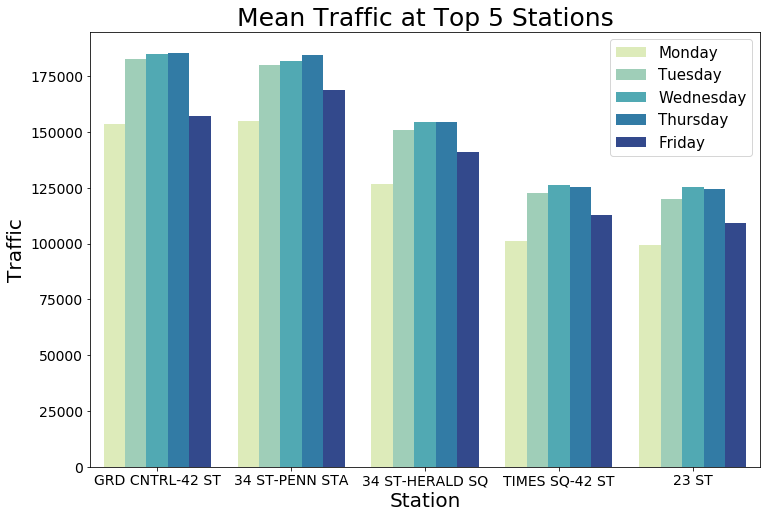

In [50]:
top_five_station = weekday_df[weekday_df['STATION'].isin(list(station_df[0:5]['STATION']))]
top_five_station_weekday = top_five_station.groupby(['STATION', 'DATE', 'WEEKDAY', 'WEEKDAYNUM']).TOTALS.sum().reset_index()
top_five_station_weekday = top_five_station_weekday.groupby(['STATION', 'WEEKDAY', 'WEEKDAYNUM']).TOTALS.mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x = 'STATION', y='TOTALS', hue='WEEKDAY' , data=top_five_station_weekday, hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday'], palette=("YlGnBu"))
plt.xlabel('Station', size=20)
plt.ylabel('Traffic', size=20)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Traffic at Top 5 Stations', size=25)

In [51]:
top_five_station_timebin_friday = top_five_station[top_five_station['WEEKDAY']=='Friday'].groupby(['STATION','TIME']).TOTALS.mean().reset_index()
top_five_station_timebin_friday.head(15)

,STATION,TIME,TOTALS
0,23 ST,4:00pm - 8:00pm,845.232877
1,23 ST,8:00am - 12:00am,652.153846
2,34 ST-HERALD SQ,4:00pm - 8:00pm,1537.846442
3,34 ST-HERALD SQ,8:00am - 12:00am,1098.268657
4,34 ST-PENN STA,4:00pm - 8:00pm,915.201207
5,34 ST-PENN STA,8:00am - 12:00am,683.347979
6,GRD CNTRL-42 ST,4:00pm - 8:00pm,1298.291793
7,GRD CNTRL-42 ST,8:00am - 12:00am,545.964992
8,TIMES SQ-42 ST,4:00pm - 8:00pm,1299.368000
9,TIMES SQ-42 ST,8:00am - 12:00am,715.721557


Text(0.5, 1.0, 'Mean Traffic on Thursdays at Top 5 Stations')

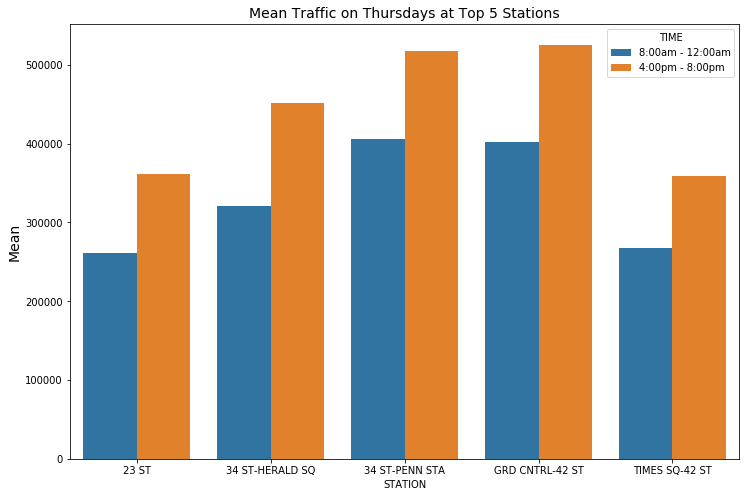

In [52]:
top_five_station_timebin_thursday = top_five_station[top_five_station['WEEKDAY']=='Thursday'].groupby(['STATION','TIME']).TOTALS.sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x = 'STATION', y='TOTALS', hue='TIME' , data=top_five_station_timebin_thursday, hue_order=['8:00am - 12:00am','4:00pm - 8:00pm'])
plt.ylabel('Mean', size=14)
plt.title('Mean Traffic on Thursdays at Top 5 Stations', size='14')

In [53]:
top_five_station_weekday = top_five_station_weekday.sort_values(by=['WEEKDAYNUM'])
#top_five_station_weekday= top_five_station_weekday.drop('WEEKDAYNUM', axis=1)
top_five_station_weekday.head(15)

,STATION,WEEKDAY,WEEKDAYNUM,TOTALS
24,23 ST,Monday,0,99445.4
14,34 ST-HERALD SQ,Monday,0,126601.8
23,TIMES SQ-42 ST,Monday,0,101152.8
11,GRD CNTRL-42 ST,Monday,0,153657.2
8,34 ST-PENN STA,Monday,0,154942.0
20,23 ST,Tuesday,1,120003.2
19,TIMES SQ-42 ST,Tuesday,1,122586.0
12,34 ST-HERALD SQ,Tuesday,1,150794.6
5,34 ST-PENN STA,Tuesday,1,179927.0
3,GRD CNTRL-42 ST,Tuesday,1,182986.0


/Users/hdeva/anaconda3/lib/python3.6/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/Users/hdeva/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Mean Traffic vs. Day of Week at Top 5 Stations')

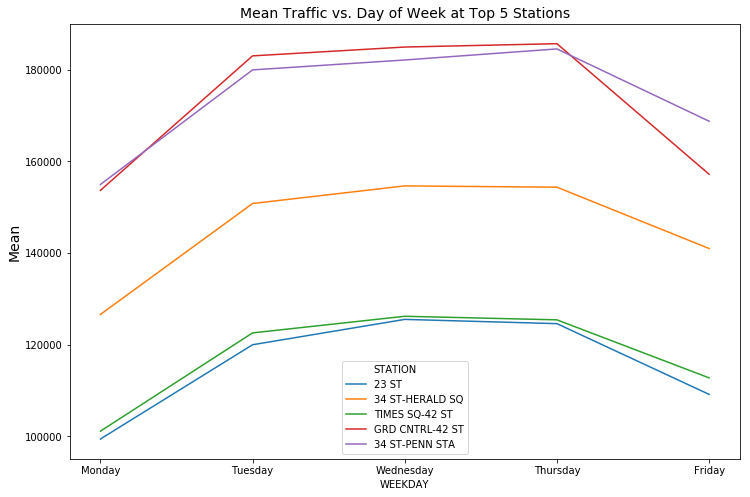

In [54]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
top_five_station_weekday['WEEKDAY'] = pd.Categorical(top_five_station_weekday['WEEKDAY'], ordered=True, categories=cats)

plt.figure(figsize=(12,8))
sns.lineplot(x = 'WEEKDAY', y='TOTALS', hue='STATION' , data=top_five_station_weekday)
plt.ylabel('Mean', size=14)
plt.title('Mean Traffic vs. Day of Week at Top 5 Stations', size='14')